https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?select=Twitter_Data.csv

# **1) Load Data**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from os import path

In [ ]:
if path.exists('Twitter_Data.csv'):
  pass
else:
  uploaded = files.upload()

In [ ]:
def run(file_name):
  df = pd.read_csv(file_name, delimiter=',')
  dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
  print('Dataset Information:\n')
  df.info()
  print('='*30)
  print(f'Shape of our dataset: {df.shape}\n')
  print(f'There are {df.shape[1]} columns in the dataset')
  print(f'There are {df.shape[0]} rows in the dataset\n')
  cat_df = dtypes_df[dtypes_df['dtype']=='object']
  num_df = dtypes_df[dtypes_df['dtype']!='object']
  print(f"There are {len(cat_df)} Categorical columns > {list(cat_df['column_name'])}")
  print(f"There are {len(dtypes_df)-len(cat_df)} Numerical columns > {list(num_df['column_name'])}\n")
  print('Types of dataset:')
  display(dtypes_df.head(5))

  print(f'\nNumber of Duplicated: {df.duplicated().sum()}\n')
  print(f'Null values:\n{df.isnull().sum()}\n')
  print('Unique Values of Emotions')
  print(df.category.value_counts())
  print('\n')

  ax = (df['category']).value_counts().plot(kind='pie', title='Sentiments Pie Chart', figsize=(11, 6))
  ax.yaxis.set_visible(False)

  return df

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
Shape of our dataset: (162980, 2)

There are 2 columns in the dataset
There are 162980 rows in the dataset

There are 1 Categorical columns > ['clean_text']
There are 1 Numerical columns > ['category']

Types of dataset:


,column_name,dtype
0,clean_text,object
1,category,float64



Number of Duplicated: 1

Null values:
clean_text    4
category      7
dtype: int64

Unique Values of Emotions
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64




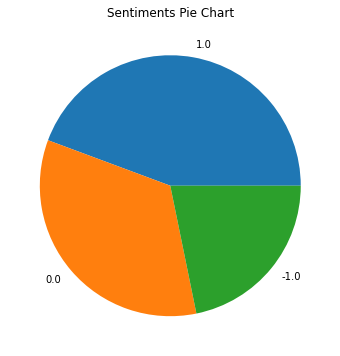

In [ ]:
data = run('Twitter_Data.csv')

# **2) Preprocessing**

The various text preprocessing steps are:

* Removing punctuations like . , ! $( ) * % @
* Numeric items to string
* Removing Stop words > Stop words are very commonly used words (a, an, the, etc.)
* Lower casing > Converting a word to lower case
* Tokenization > Splitting the sentence into words
* Stemming > a process of transforming a word to its root form
* Lemmatization > Lemmatization is preferred over Stemming (morphological analysis of the words)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import string
import inflect
import re

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import contractions


porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

We can see that there are 13 different classes and some of the are having very few examples. (i.e. Anger, Boredom, Empty etc...). This is a very imbalanced dataset and it will not allow the model to converge. We'll reduce the number of classes.

In [ ]:
# Load Tweet dataset
df = pd.read_csv('/content/Twitter_Data.csv')
df = df[:60000]
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


### Cleaning the tweets

In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    #words = [PorterStemmer().stem(w) for w in words]
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]
    # return list
    return words

#print("\nOriginal tweet ->", df['clean_text'][0])
#print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(59999, 2)

### Features and Target Column

In [ ]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_text']))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [ ]:
print(X[0])
print(Y[0])

['modi', 'promised', 'minimum', 'government', 'maximum', 'governance', 'expected', 'begin', 'difficult', 'job', 'reforming', 'state', 'take', 'year', 'get', 'justice', 'state', 'business', 'exit', 'psus', 'temple']
0


In [ ]:
from sklearn.model_selection import train_test_split
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['100', '1000', '10000', '1068', '108', '10k', '10th', '111', '1145', '1200', '12000', '125', '12k', '130', '15', '150', '1500', '1500000', '1520', '15l', '15lac', '15lacs', '15lakh', '15lakhs', '180', '1947', '1958', '1962', '1969', '1971', '1998', '1st', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '201213', '2013', '2014', '2015', '2016', '2017', '2018', '201819', '2019', '2020', '2022', '2024', '2025', '2029', '21st', '23rd', '24x7', '250', '2611', '272', '27th', '2cr', '2nd', '300', '3000', '30000', '300km', '350', '350000', '365', '370', '3rd', '400', '4000', '4th', '500', '5000', '5cr', '5th', '5years', '5yrs', '6000', '6000month', '6000year', '60yrs', '6th', '72000', '72000year', '72k', '8020', '90', 'aadhaar', 'aadhar', 'aaj', 'aam', 'aap', 'aaya', 'aayega', 'aayog', 'abandoned', 'abdul', 'abdullah', 'abe', 'abhi', 'abhinandan', 'abhisar', 'ability', 'abki', 'able', 'abp', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abused',

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
max_words = 5000
max_len=25

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

#print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
#print('After Tokenization & Padding \n', X[0])

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (35999, 25) (35999, 3)
Validation Set -> (12000, 25) (12000, 3)
Test Set -> (12000, 25) (12000, 3)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


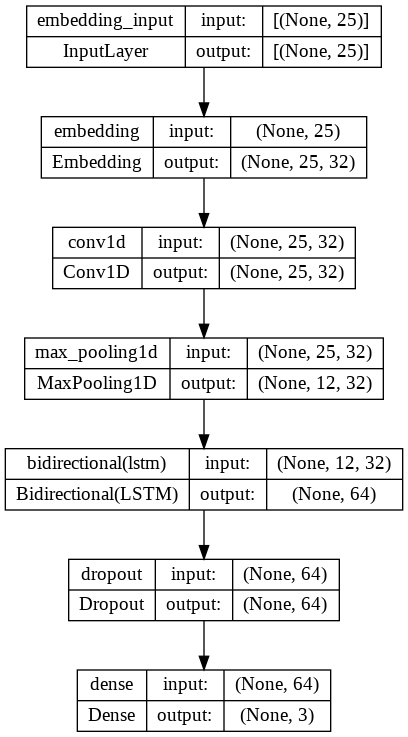

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 25, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8691
Precision : 0.8769
Recall    : 0.8627
F1 Score  : 0.8697


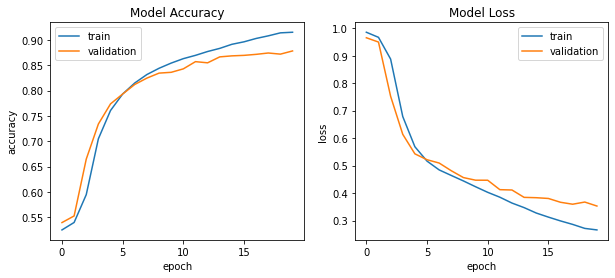

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kerastuner.tuners import RandomSearch

<ipython-input-29-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
from kerastuner import HyperModel


def build_model_2(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(hp.Float('Dropout',min_value=0.1,max_value=0.4,step=0.1)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=hp.Choice('optimizer',values=['adam', 'sgd' ],default='sgd'),metrics = ['accuracy', Precision(), Recall()])
    return model

In [ ]:
tuner_model_2= RandomSearch(
        build_model_2,
        objective='val_accuracy',
        max_trials=5,directory='project',project_name='best model')

In [ ]:
tuner_model_2.search_space_summary()

Search space summary
Default search space size: 2
Dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.4, 'step': 0.1, 'sampling': None}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [ ]:
tuner_model_2.search(X_train, y_train, epochs=5, validation_data = (X_val, y_val))

In [ ]:
tuner_model_2.get_best_hyperparameters()[0].values

{'Dropout': 0.30000000000000004, 'optimizer': 'adam'}

In [ ]:
best_model = tuner_model_2.get_best_models()[0]
best_model.evaluate(X_test, y_test)

375/375 [==============================] - 4s 5ms/step - loss: 2.4067 - accuracy: 0.4232 - precision: 0.4239 - recall: 0.4202


[2.4067251682281494,
 0.4231666624546051,
 0.4238883852958679,
 0.4202499985694885]

In [ ]:
history = best_model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=5, verbose=1)

Epoch 1/5
563/563 [==============================] - 14s 18ms/step - loss: 0.9977 - accuracy: 0.5238 - precision: 0.5780 - recall: 0.3347 - val_loss: 0.8897 - val_accuracy: 0.5940 - val_precision: 0.6636 - val_recall: 0.4620
Epoch 2/5
563/563 [==============================] - 9s 16ms/step - loss: 0.5236 - accuracy: 0.7893 - precision: 0.8328 - recall: 0.7429 - val_loss: 0.3112 - val_accuracy: 0.8968 - val_precision: 0.9039 - val_recall: 0.8893
Epoch 3/5
563/563 [==============================] - 9s 16ms/step - loss: 0.2533 - accuracy: 0.9200 - precision: 0.9248 - recall: 0.9147 - val_loss: 0.2798 - val_accuracy: 0.9105 - val_precision: 0.9159 - val_recall: 0.9056
Epoch 4/5
563/563 [==============================] - 7s 12ms/step - loss: 0.2009 - accuracy: 0.9401 - precision: 0.9452 - recall: 0.9354 - val_loss: 0.2797 - val_accuracy: 0.9101 - val_precision: 0.9157 - val_recall: 0.9046
Epoch 5/5
563/563 [==============================] - 6s 10ms/step - loss: 0.1611 - accuracy: 0.9536 - p

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = best_model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8957
Precision : 0.9019
Recall    : 0.8911
F1 Score  : 0.8965


In [ ]:
# # Save the model architecture & the weights
# model.save('best_model')
# print('Best model saved')

In [ ]:
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)
best_model.save('best_model.h5')
new_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
new_model.evaluate(X_test, y_test)

375/375 [==============================] - 3s 4ms/step - loss: 0.3241 - accuracy: 0.8957 - precision: 0.9019 - recall: 0.8911


[0.32408201694488525,
 0.8956666588783264,
 0.9019061923027039,
 0.8910833597183228]

In [ ]:

def predict(text):
    series = pd.Series(text)
    #tokenizer.fit_on_texts(series)
    X = pad_sequences(tokenizer.texts_to_sequences(series),
                      padding='post', maxlen=25)
    return int(np.argmax(new_model.predict(X))) - 1

In [ ]:
predict('never underestimate the power stupid people')

1/1 [==============================] - 1s 718ms/step


0

In [ ]:
new_test = list(map(predict, df['clean_text'][:100]))

1/1 [==============================] - 0s 23ms/step


In [ ]:
new_test

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 0,
 1,
 1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 0,
 1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1]

In [ ]:
real = list(df['category'][:100])

for i in zip(new_test, real):
  print(i)

(1, 'Negative')
(0, 'Neutral')
(0, 'Positive')
(1, 'Positive')
(1, 'Positive')
(0, 'Neutral')
(1, 'Neutral')
(0, 'Neutral')
(1, 'Positive')
(0, 'Positive')
(1, 'Positive')
(1, 'Positive')
(0, 'Positive')
(0, 'Neutral')
(0, 'Neutral')
(-1, 'Negative')
(0, 'Neutral')
(0, 'Neutral')
(1, 'Positive')
(-1, 'Negative')
(1, 'Positive')
(0, 'Negative')
(0, 'Neutral')
(-1, 'Negative')
(-1, 'Negative')
(1, 'Positive')
(0, 'Neutral')
(0, 'Neutral')
(0, 'Neutral')
(-1, 'Neutral')
(0, 'Positive')
(1, 'Neutral')
(1, 'Negative')
(1, 'Positive')
(-1, 'Negative')
(0, 'Neutral')
(1, 'Positive')
(1, 'Positive')
(-1, 'Negative')
(-1, 'Negative')
(0, 'Positive')
(-1, 'Neutral')
(1, 'Neutral')
(1, 'Positive')
(1, 'Positive')
(1, 'Positive')
(0, 'Positive')
(0, 'Neutral')
(1, 'Positive')
(-1, 'Negative')
(1, 'Positive')
(0, 'Neutral')
(-1, 'Neutral')
(1, 'Negative')
(1, 'Positive')
(-1, 'Negative')
(0, 'Neutral')
(0, 'Neutral')
(1, 'Neutral')
(1, 'Neutral')
(-1, 'Negative')
(0, 'Neutral')
(1, 'Negative')
(1, 